<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   StationName          138 non-null    object 
 1   Address              138 non-null    object 
 2   Latitude             138 non-null    float64
 3   Longitude            138 non-null    float64
 4   ChargingType         138 non-null    object 
 5   IsOnline             138 non-null    bool   
 6   HighwayProximity     138 non-null    bool   
 7   ParkingAvailable     138 non-null    bool   
 8   RestaurantAvailable  138 non-null    bool   
 9   CafeAvailable        138 non-null    bool   
 10  MarketAvailable      138 non-null    bool   
 11  WifiAvailable        138 non-null    bool   
dtypes: bool(7), float64(2), object(3)
memory usage: 6.5+ KB


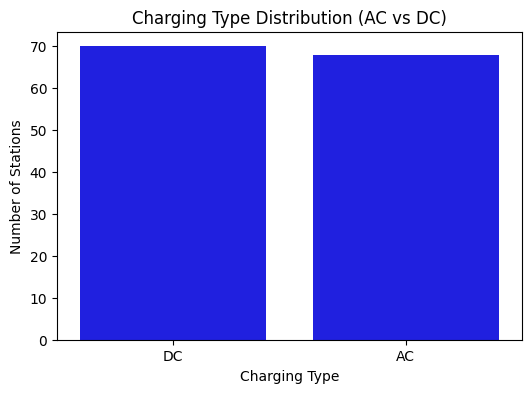

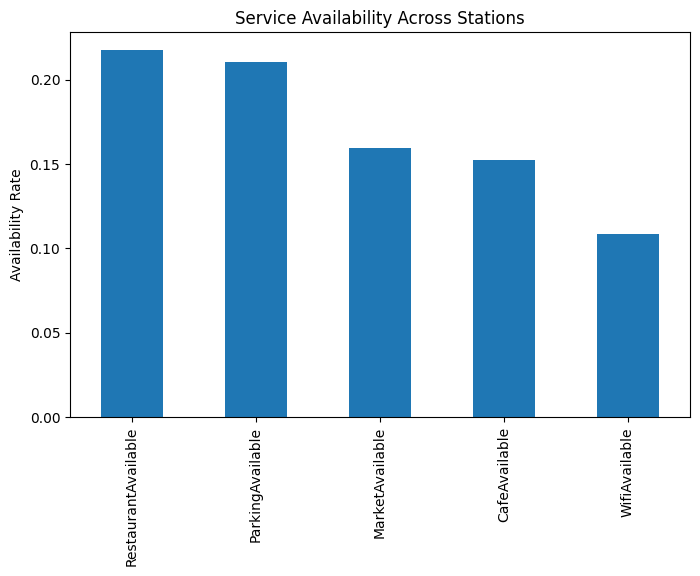

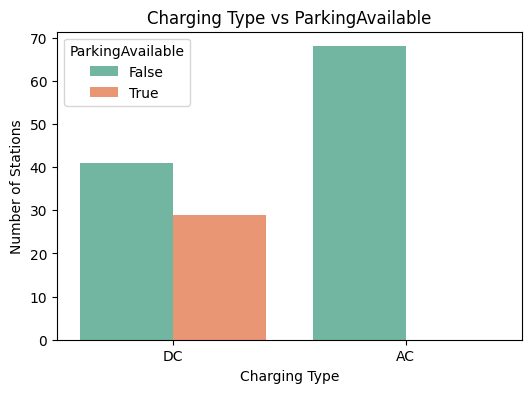

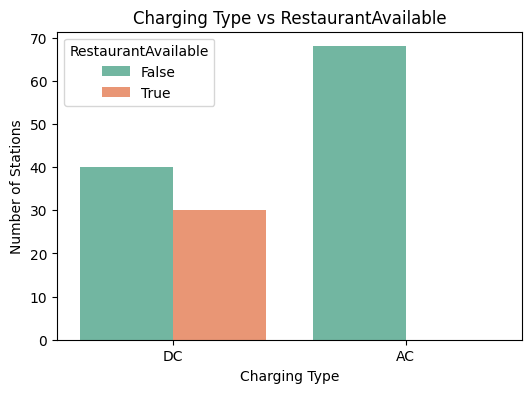

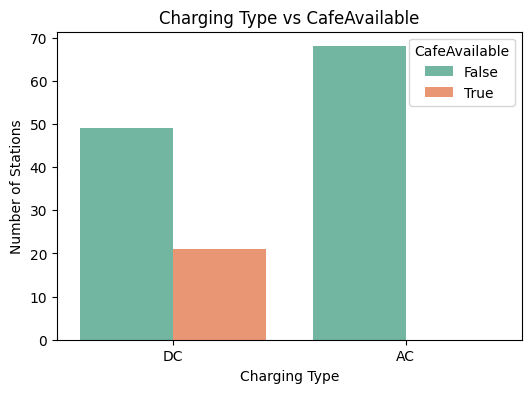

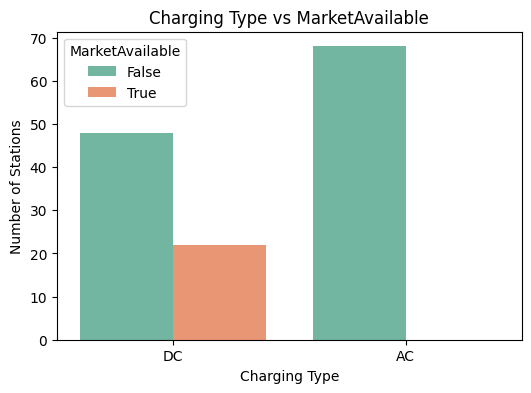

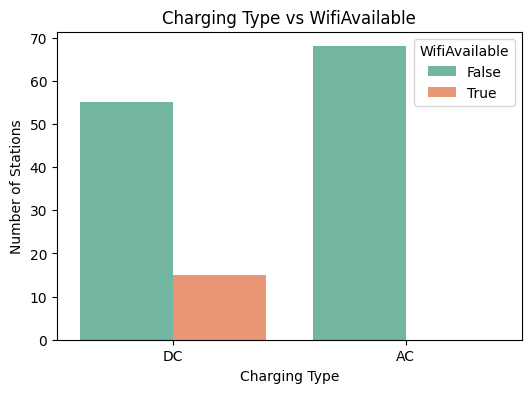

Chi-Square Test for Parking Availability and Charging Type
Chi2 Statistic: 33.21430844403563
p-value: 8.254093119756764e-09
Conclusion: There is a significant relationship between Parking Availability and Charging Type.

Summary:
- Identified the distribution of AC and DC charging stations.
- Analyzed the availability of key services across stations.
- Conducted hypothesis testing to explore associations between services and charging types.


In [7]:
## EV Charging Station Services and Charging Type Analysis - DSA210 Project

# 1. Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import json

%matplotlib inline

# 2. Load the Dataset
with open('/mnt/data/dataset.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 3. Extract Relevant Fields
records = []
for item in data:
    records.append({
        'StationName': item.get('tesis_adi'),
        'Address': item.get('tesis_adres'),
        'Latitude': float(item.get('tesis_lokasyon_lat')) if item.get('tesis_lokasyon_lat') else None,
        'Longitude': float(item.get('tesis_lokasyon_long')) if item.get('tesis_lokasyon_long') else None,
        'ChargingType': item.get('marker_type'),
        'IsOnline': item.get('is_online'),
        'HighwayProximity': item.get('karayollari_icinde_mi'),
        'ParkingAvailable': item['services']['otopark'] if item.get('services') and 'otopark' in item['services'] else False,
        'RestaurantAvailable': item['services']['restoran'] if item.get('services') and 'restoran' in item['services'] else False,
        'CafeAvailable': item['services']['kafe'] if item.get('services') and 'kafe' in item['services'] else False,
        'MarketAvailable': item['services']['market'] if item.get('services') and 'market' in item['services'] else False,
        'WifiAvailable': item['services']['wifi'] if item.get('services') and 'wifi' in item['services'] else False,
    })

# Create DataFrame
df = pd.DataFrame(records)

# 4. Basic Information
df.info()

# 5. Check for Missing Values
df.isnull().sum()

# 6. Exploratory Data Analysis (EDA)

## 6.1 Charging Type Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='ChargingType', data=df, color='b')
plt.title('Charging Type Distribution (AC vs DC)')
plt.xlabel('Charging Type')
plt.ylabel('Number of Stations')
plt.show()

## 6.2 Service Availability Rates
service_cols = ['ParkingAvailable', 'RestaurantAvailable', 'CafeAvailable', 'MarketAvailable', 'WifiAvailable']

service_availability = df[service_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
service_availability.plot(kind='bar')
plt.title('Service Availability Across Stations')
plt.ylabel('Availability Rate')
plt.show()

# 7. Charging Type vs Service Availability
for service in service_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x='ChargingType', hue=service, data=df, palette='Set2')
    plt.title(f'Charging Type vs {service}')
    plt.xlabel('Charging Type')
    plt.ylabel('Number of Stations')
    plt.legend(title=service)
    plt.show()

# 8. Hypothesis Testing: Service Availability vs Charging Type

# Example: Parking Availability vs Charging Type
contingency_table = pd.crosstab(df['ChargingType'], df['ParkingAvailable'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print('Chi-Square Test for Parking Availability and Charging Type')
print('Chi2 Statistic:', chi2)
print('p-value:', p)

if p < 0.05:
    print('Conclusion: There is a significant relationship between Parking Availability and Charging Type.')
else:
    print('Conclusion: There is no significant relationship between Parking Availability and Charging Type.')

# 9. General Observations
print("\nSummary:")
print("- Identified the distribution of AC and DC charging stations.")
print("- Analyzed the availability of key services across stations.")
print("- Conducted hypothesis testing to explore associations between services and charging types.")

# 10. End of Analysis
